In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

In [3]:
ctf = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]

# Load dataset
train_loader = FromPublic('cifar10', 'train', batch_size=512, num_workers=4, custom_tf=ctf)
test_loader = FromPublic('cifar10', 'test', batch_size=512, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Model
model = SENet18(input_dim=3)

# Learning
runner = Runner(model, train_loader, test_loader, optimizer='adam', loss_fn='focal')

In [5]:
runner.load('cam.h5')

In [6]:
runner.validate()

0.8958

Test set: Average loss: 0.3605


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


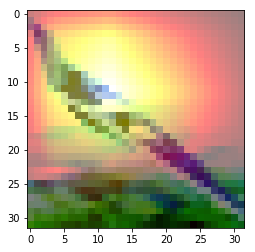

In [18]:
x, y = next(iter(test_loader))
x, y = x[None, 1], y[None, 1]
vx = Variable(x.cuda())
runner.cam(vx, -3, 512, 10)